In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# 2. Đọc file dữ liệu chứng khoán JPY và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EURUSDX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,1.189910,1.193987,1.185213,1.189825,1.189825,0.0
1,2017-12-04,1.185705,1.187874,1.183124,1.185986,1.185986,0.0
2,2017-12-05,1.186859,1.187931,1.180889,1.186775,1.186775,0.0
3,2017-12-06,1.183054,1.184834,1.178134,1.183292,1.183292,0.0
4,2017-12-07,1.180498,1.180916,1.177718,1.180429,1.180429,0.0
...,...,...,...,...,...,...,...
1436,2023-06-05,1.069862,1.072271,1.067475,1.069862,1.069862,0.0
1437,2023-06-06,1.071180,1.073307,1.066735,1.071180,1.071180,0.0
1438,2023-06-07,1.069805,1.074022,1.066883,1.069805,1.069805,0.0
1439,2023-06-08,1.070744,1.078283,1.070217,1.070744,1.070744,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.0
mean,1.132248,1.135641,1.128733,1.132277,1.132277,0.0
std,0.059738,0.059364,0.060090,0.059746,0.059746,0.0
min,0.959619,0.967006,0.954016,0.959619,0.959619,0.0
25%,1.096876,1.099850,1.092818,1.096933,1.096933,0.0
50%,1.131932,1.135254,1.129044,1.132067,1.132067,0.0
75%,1.178446,1.181530,1.175396,1.178411,1.178411,0.0
max,1.251267,1.255808,1.245051,1.251001,1.251001,0.0


In [5]:
df1=df[['Date','Close']]
df1

,Date,Close
0,2017-12-01,1.189825
1,2017-12-04,1.185986
2,2017-12-05,1.186775
3,2017-12-06,1.183292
4,2017-12-07,1.180429
...,...,...
1436,2023-06-05,1.069862
1437,2023-06-06,1.071180
1438,2023-06-07,1.069805
1439,2023-06-08,1.070744


In [6]:
df1=df1.set_index('Date')
df1

,Close
Date,
2017-12-01,1.189825
2017-12-04,1.185986
2017-12-05,1.186775
2017-12-06,1.183292
2017-12-07,1.180429
...,...
2023-06-05,1.069862
2023-06-06,1.071180
2023-06-07,1.069805


In [7]:
df1.index=pd.to_datetime(df1.index)
df1

,Close
Date,
2017-12-01,1.189825
2017-12-04,1.185986
2017-12-05,1.186775
2017-12-06,1.183292
2017-12-07,1.180429
...,...
2023-06-05,1.069862
2023-06-06,1.071180
2023-06-07,1.069805


In [8]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

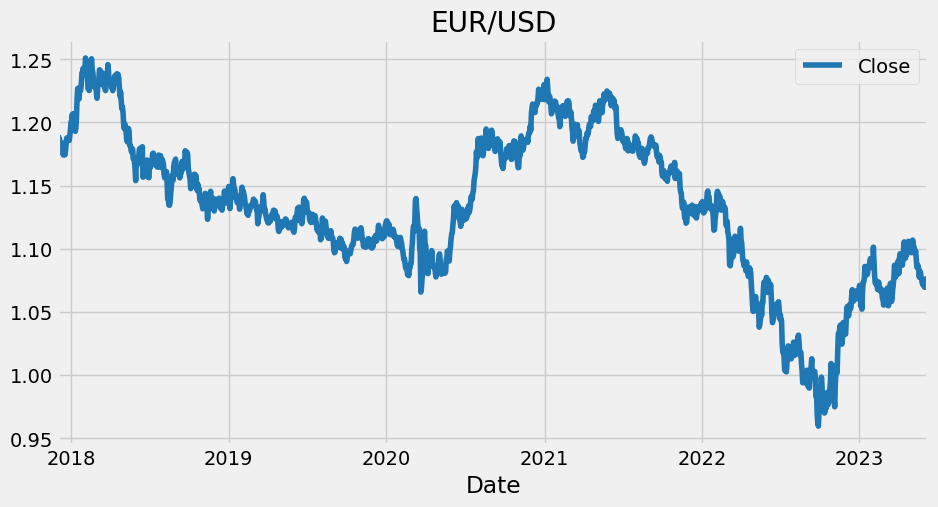

In [9]:
df1.plot(style='-',
        figsize=(10, 5),
        color=color_pal[0],
        title='EUR/USD')
plt.show()

In [10]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [11]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [13]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1.1641229  1.16412944 1.16413599 1.16414254 1.16414908 1.16415563
 1.16416217 1.16416872 1.16417527 1.16418181 1.16418836 1.16419491
 1.16420145 1.164208   1.16421454 1.16422109 1.16422764 1.16423418
 1.16424073 1.16424728 1.16425382 1.16426037 1.16426691 1.16427346
 1.16428001 1.16428655 1.1642931  1.16429965 1.16430619 1.16431274]


In [15]:
# Chia train test lại
train_data1 = df[:train_size]
test_data1 = df[train_size:train_size+test_size]
val_data1 = df[train_size+test_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [16]:
# 7. Đánh giá độ chính xác validate, test
##RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
##MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

##MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 0.09108105564040671
Testing RMSE: 0.10863267261509055
Validation MAPE: 8.349721158772812
Testing MAPE: 8.803038730774682
Validation MAE: 0.0893805291532425
Testing MAE: 0.09073230748132113


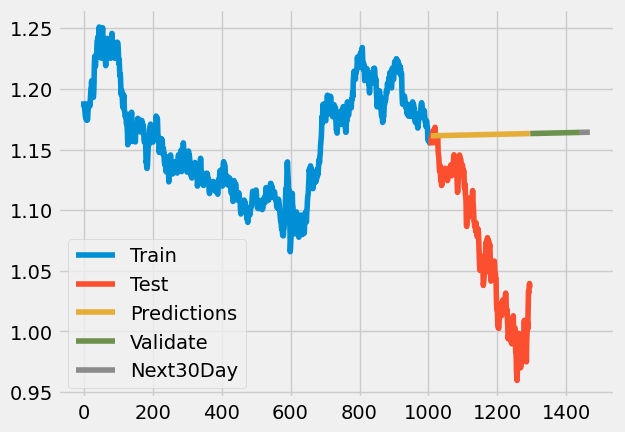

In [17]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [18]:
test_data.index

RangeIndex(start=1007, stop=1295, step=1)